In [ ]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kurtosistest

import plotly.express as px #  !pip install plotly --upgrade
import seaborn as sns
from pandas.plotting import scatter_matrix
import warnings
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [ ]:
train_data = pd.read_csv('/content/Train.csv')
test_data = pd.read_csv('/content/Test.csv')

In [ ]:
train_data.head()

,Day,GrocerySales
0,1,8418.59
1,2,8447.47
2,3,8336.49
3,4,8579.17
4,5,8524.31


In [ ]:
test_data.head()

,Day
0,693
1,694
2,695
3,696
4,697


In [ ]:
print(train_data.shape)
test_data.shape

(692, 2)


(90, 1)

In [ ]:
train_data.isna().sum()

Day             0
GrocerySales    0
dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Day           692 non-null    int64  
 1   GrocerySales  692 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 10.9 KB


In [ ]:
train_data.describe()

,Day,GrocerySales
count,692.000000,692.000000
mean,346.500000,8564.733471
std,199.907479,428.815668
min,1.000000,6766.370000
25%,173.750000,8411.536858
50%,346.500000,8677.770000
75%,519.250000,8852.387500
max,692.000000,9290.020000


In [ ]:
# Checking Normality of data

k2,p = stats.normaltest(train_data['GrocerySales'])
print("P : ",p)
alpha = 1e-3

# Null Hypothesis : Data come from Normal Distribution
# Alternate Hypothesis : Data not from Normal Distribution

if p < alpha:
  print("Null Hypothesis can be rejected.")
else:
  print('Null Hypothesis cannot be rejected.')

P :  3.704997073895812e-33
Null Hypothesis can be rejected.


In [ ]:
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Day,GrocerySales
Day,1.000000,0.499172
GrocerySales,0.499172,1.000000


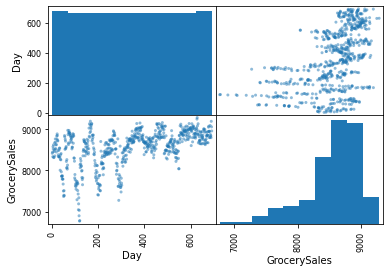

In [ ]:
scatter_matrix(train_data);

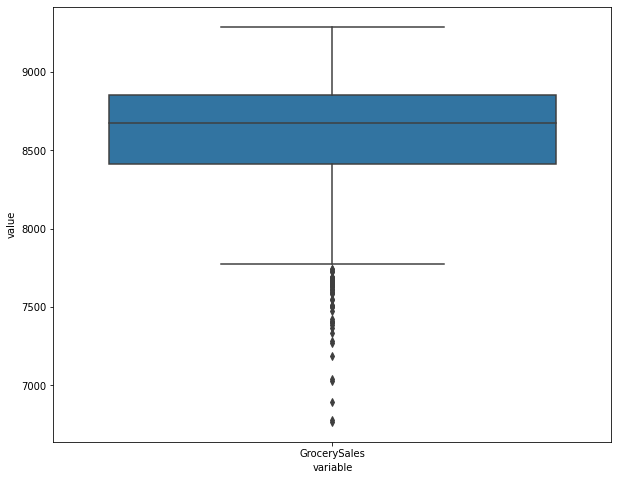

In [ ]:
# Checking the outliers

# pd.melt() --> Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
plt.figure(figsize = (10,8))
sns.boxplot(x = 'variable',y = 'value',data = pd.melt(train_data[['GrocerySales']]))

In [ ]:
# treemap
# A treemap plot represents hierarchial data as nested rectangular sectors
fig = px.treemap(train_data,path=['GrocerySales'],color = 'GrocerySales',hover_data=['Day','GrocerySales'])
fig.show()


In [ ]:
#scatter plot
fig = px.scatter(train_data, x="Day", y="GrocerySales", trendline="ols")
fig.show()

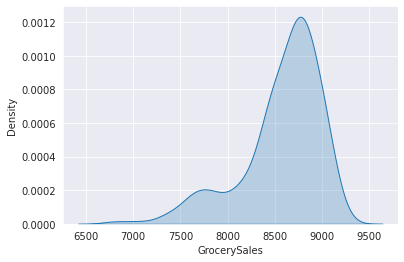

In [ ]:
sns.kdeplot(data = train_data['GrocerySales'],label = 'Grocery Sales',shade = True);


In [ ]:
# Model Building
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import  DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error


In [ ]:
X = train_data['Day']
Y = train_data['GrocerySales']
X_pred = test_data['Day']

In [ ]:
X = np.array(X)
X = X.reshape(-1, 1)
X.shape

(692, 1)

In [ ]:
X_pred = np.array(X_pred)
X_pred = X_pred.reshape(-1,1)

In [ ]:
# Scaling the data
rs = RobustScaler()
x_scaled = rs.fit_transform(X)
x_pred_scaled = rs.fit_transform(X_pred)

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, Y,test_size=0.3,random_state = 42)

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predict = lr.predict(test_X)
print('Mean Squared Error: %.2f'% mean_squared_error(test_y,predict))
print('Mean Absolute Error: %.2f'% mean_absolute_error(test_y,predict))

Mean Squared Error: 142343.84
Mean Absolute Error: 290.98


In [ ]:
y_pred_lr = lr.predict(X_pred)


In [ ]:
knn = KNeighborsRegressor()
knn.fit(train_X,train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
predict_knn = knn.predict(test_X)
print('Mean Squared Error: %.2f'% mean_squared_error(test_y,predict_knn))
print('Mean Absolute Error: %.2f'% mean_absolute_error(test_y,predict_knn))

Mean Squared Error: 44270.05
Mean Absolute Error: 156.37


In [ ]:
y_pred_knn = knn.predict(test_X)


In [ ]:
# Using scaled data
scaled_train_X, scaled_test_X, train_y, test_y = train_test_split(x_scaled, Y, test_size=0.3,random_state = 42)

In [ ]:
lr = LinearRegression()
lr.fit(scaled_train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
scaled_predict = lr.predict(scaled_test_X)
print('Mean Squared Error: %.2f'% mean_squared_error(test_y,scaled_predict))
print('Mean Absolute Error: %.2f'% mean_absolute_error(test_y,scaled_predict))

Mean Squared Error: 142343.84
Mean Absolute Error: 290.98


In [ ]:
knn = KNeighborsRegressor()
knn.fit(scaled_train_X,train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
scaled_predict_knn = knn.predict(scaled_test_X)
print('Mean Squared Error: %.2f'% mean_squared_error(test_y,scaled_predict_knn))
print('Mean Absolute Error: %.2f'% mean_absolute_error(test_y,scaled_predict_knn))

Mean Squared Error: 45194.10
Mean Absolute Error: 157.37


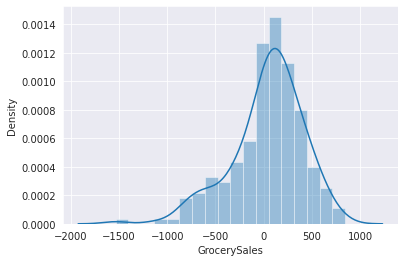

In [ ]:
# Plotting the prediction
sns.distplot(test_y-scaled_predict);

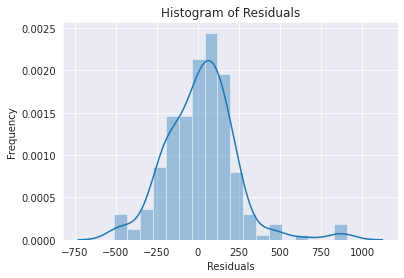

In [ ]:
sns.distplot(test_y-scaled_predict_knn)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()